In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.3 MB/s eta 0:00:00


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [102]:
df = pd.read_excel('대구 데이터프레임(2차 추가).xlsx')
df.head()

,행정구역,노인 인구 수,고독사 수,독거노인 수,병원 수,약국 수,경로당 수,공공체육시설 수,공원 수,버스정류장 수,지하철 역 수,안전지수,마트 수,음식점 수
0,중구,17113,21.3,3467,467,151,48,2,17,118,10,3.7,35,2989
1,동구,76756,48.7,14661,494,184,222,23,91,583,13,3.7,23,4497
2,서구,42936,28.3,8822,269,109,79,13,28,189,4,4.2,15,2375
3,남구,36561,21.0,8061,258,109,67,6,24,164,9,3.8,18,2176
4,북구,73675,30.7,12761,591,205,283,38,130,592,14,3.0,46,4957


In [103]:
dfStandard = df.drop(columns='행정구역')
dfStandard.head()

,노인 인구 수,고독사 수,독거노인 수,병원 수,약국 수,경로당 수,공공체육시설 수,공원 수,버스정류장 수,지하철 역 수,안전지수,마트 수,음식점 수
0,17113,21.3,3467,467,151,48,2,17,118,10,3.7,35,2989
1,76756,48.7,14661,494,184,222,23,91,583,13,3.7,23,4497
2,42936,28.3,8822,269,109,79,13,28,189,4,4.2,15,2375
3,36561,21.0,8061,258,109,67,6,24,164,9,3.8,18,2176
4,73675,30.7,12761,591,205,283,38,130,592,14,3.0,46,4957


In [104]:
scaler = StandardScaler()
df_standardized_values = scaler.fit_transform(dfStandard)
df_standardized = pd.DataFrame(df_standardized_values, columns=dfStandard.columns)

In [105]:
df_standardized['행정구역'] = df['행정구역']
print(df_standardized)

    노인 인구 수     고독사 수    독거노인 수      병원 수      약국 수     경로당 수  공공체육시설 수  \
0 -1.623076 -0.576606 -1.612695 -0.185920 -0.290513 -1.398634 -1.392024   
1  0.803703  1.872851  0.979054 -0.067806  0.261253  0.269660 -0.180314   
2 -0.572379  0.049168 -0.372850 -1.052091 -0.992762 -1.101409 -0.757319   
3 -0.831768 -0.603425 -0.549045 -1.100211 -0.992762 -1.216464 -1.161222   
4  0.678342  0.263719  0.539147  0.356530  0.612377  0.854521  0.685193   
5  0.732539  0.558727  0.498629  1.502674  0.846460  0.528533  0.338990   
6  1.495650  0.263719  1.548619  1.520173  1.799512  0.768230  0.742894   
7 -0.683011 -1.828153 -1.030859 -0.973348 -1.243565  1.295564  1.723802   

       공원 수   버스정류장 수   지하철 역 수      안전지수      마트 수     음식점 수 행정구역  
0 -1.256847 -1.389848 -0.218218  0.642999  0.735093 -0.652242   중구  
1  0.088638  0.776149  0.436436  0.642999 -0.273035  0.457112   동구  
2 -1.056843 -1.059126 -1.527525  1.399469 -0.945120 -1.103929   서구  
3 -1.129572 -1.175578 -0.436436  0.794293 -0.693

In [106]:
df_standardized.to_excel('S - 정규화.xlsx', index=False)

In [107]:
dfAverage = pd.read_excel('정규화 평균 지수.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()

,수요 지수,인프라 지수,접근성 지수,환경 지수
0,-1.270792,-0.530707,-0.804033,-0.306924
1,1.218536,0.077812,0.606292,0.365819
2,-0.298687,-0.992105,-1.293326,0.171313
3,-0.661412,-1.069012,-0.806007,-0.167639
4,0.493736,0.827223,0.736363,0.190844


**KMeans**

In [116]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


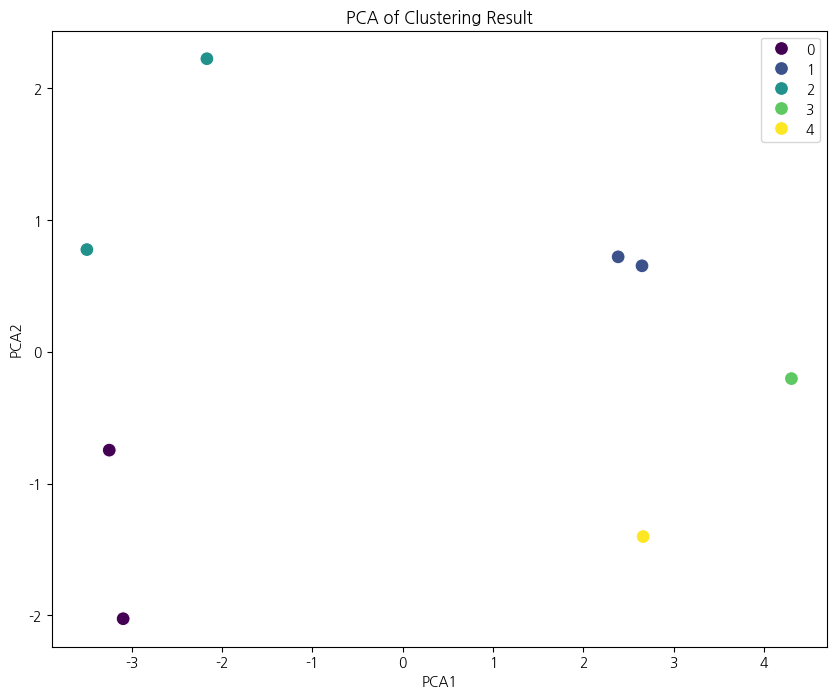

In [117]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(dfAverage.drop('Cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=dfAverage, palette='viridis', s=100)
plt.title('PCA of Clustering Result')
plt.legend()
plt.show()

In [118]:
dfAverage.to_excel('S - KMeans클러스터링 결과.xlsx', index=False)

**DBSCAN**

In [119]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(dfAverage)
dfAverage['Cluster'] = db.labels_
print(dfAverage)

      수요 지수    인프라 지수    접근성 지수     환경 지수  Cluster      PCA1      PCA2
0 -1.270792 -0.530707 -0.804033 -0.306924       -1 -3.494927  0.776079
1  1.218536  0.077812  0.606292  0.365819       -1  2.662637 -1.401165
2 -0.298687 -0.992105 -1.293326  0.171313       -1 -3.093525 -2.024552
3 -0.661412 -1.069012 -0.806007 -0.167639       -1 -3.247466 -0.745529
4  0.493736  0.827223  0.736363  0.190844       -1  2.649913  0.652892
5  0.596631  0.605950  0.760560 -0.196819       -1  2.385771  0.720953
6  1.102662  1.287525  0.780259  0.663582       -1  4.303987 -0.202788
7 -1.180674 -0.206687  0.019891 -0.720175       -1 -2.166390  2.224110


**계층적 군집화**

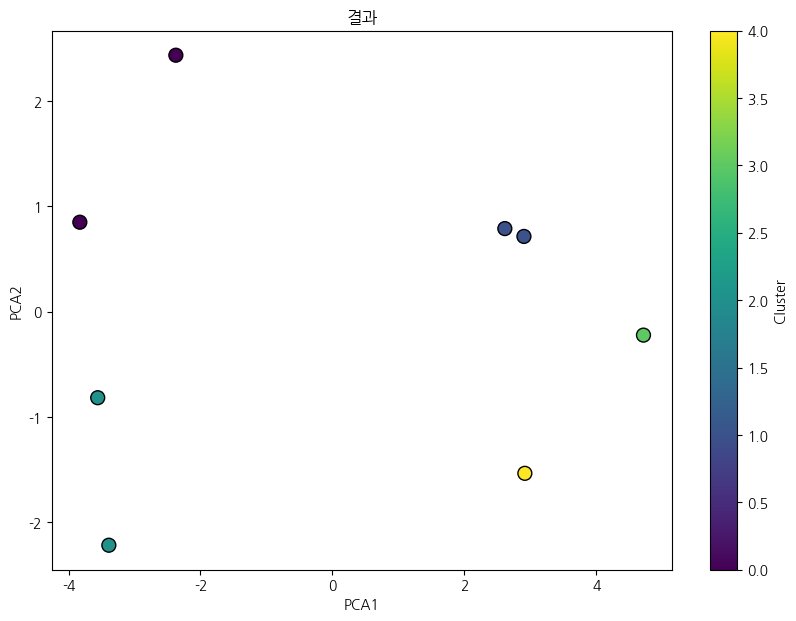

In [120]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

agg = AgglomerativeClustering(n_clusters=5)
clusters = agg.fit_predict(dfAverage)
dfAverage['Cluster'] = clusters
pca = PCA(n_components=4)
principal_components = pca.fit_transform(dfAverage.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dfAverage['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [121]:
dfAverage.to_excel('S - 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [122]:
pip install scikit-learn-extra

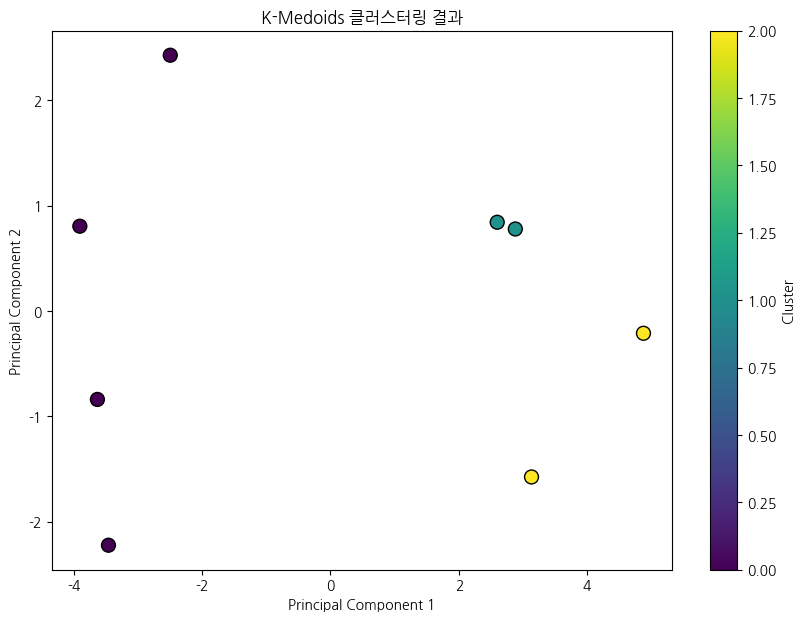

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['Cluster'] = clusters

pca = PCA(n_components=4)
principal_components = pca.fit_transform(dfAverage)

plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dfAverage['Cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')
plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [125]:
dfAverage.to_excel('S - K-Medoids클러스터링 결과.xlsx', index=False)